# 1.심화 프로젝트: 데이터 수집

In [44]:
#기본 모듈 불러오기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [45]:
# 모든 열과 행을 출력하는 옵션 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# # DataFrame의 정보 출력
# print(df.info())

# # 설정된 옵션 초기화
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')

와인 데이터 속성
- id: 와인 식별자
- name: 와인 이름
- producer: 생산자
- nation: 원산지 국가
- local1 ~ local4: 지역 정보
- varieties1 ~ varieties12: 와인의 다양한 품종 정보
- type: 와인의 종류
- use: 와인의 용도
- abv: 알코올 도수
- degree: 마시는 온도
- sweet: 당도 순위 (1부터 5까지의 점수)
- acidity: 산도 순위 (1부터 5까지의 점수)
- body: 바디감 순위 (1부터 5까지의 점수)
- tannin: 타닌 순위 (1부터 5까지의 점수)
- price: 한화로 표시된 와인 가격
- year: 생산 연도
- ml: 와인 용량 (밀리리터)

와인 데이터로 가격 예측 모델 만들기(y=price)

In [4]:
# 필요한 데이터셋을 불러오고 확인한다.
df = pd.read_csv('C:/sparta_python/wine/wine_info.csv') #, encoding = 'utf-8')
df.head(3)

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,137197,Altair,알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,Merlot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000.0,2014.0,750.0
1,137198,"Altair, Sideral",알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,Carmenere,Cabernet Franc,Syrah & Shiraz,Petit Verdot,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000.0,2016.0,750.0
2,137199,Baron du Val Red,바론 듀 발 Baron du Val,프랑스 France,NaN,NaN,NaN,NaN,Carignan,Cinsault,Syrah & Shiraz,Grenache Noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,NaN,NaN,750.0


In [5]:
# 가격정보를 정확히 비교하기 위해 '100ml당'이라는 기준을 설정했다.
df['price/100ml'] = df['price']/(df['ml']/100)
df.head(3)

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml,price/100ml
0,137197,Altair,알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,Merlot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000.0,2014.0,750.0,29333.333333
1,137198,"Altair, Sideral",알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,Carmenere,Cabernet Franc,Syrah & Shiraz,Petit Verdot,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000.0,2016.0,750.0,14666.666667
2,137199,Baron du Val Red,바론 듀 발 Baron du Val,프랑스 France,NaN,NaN,NaN,NaN,Carignan,Cinsault,Syrah & Shiraz,Grenache Noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,NaN,NaN,750.0,NaN


In [6]:
# 소수점이 지저분해서 반올림해서 정수형으로 바꿔준다.
df['price/100ml'] = round(df['price/100ml'])
df.head(3)

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml,price/100ml
0,137197,Altair,알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,Merlot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000.0,2014.0,750.0,29333.0
1,137198,"Altair, Sideral",알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,Carmenere,Cabernet Franc,Syrah & Shiraz,Petit Verdot,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000.0,2016.0,750.0,14667.0
2,137199,Baron du Val Red,바론 듀 발 Baron du Val,프랑스 France,NaN,NaN,NaN,NaN,Carignan,Cinsault,Syrah & Shiraz,Grenache Noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,NaN,NaN,750.0,NaN


In [7]:
# 데이터 확인
df.tail(3)

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml,price/100ml
21602,168705,"Leopard’s Leap, Chardonnay Pinot Noir",레오파드 립 Leopard's Leap,남아프리카 공화국 the Republic of South Africa,웨스턴 케이프 Western Cape,NaN,NaN,NaN,Chardonnay,Pinot Noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rose,"Appetizer, Table",12~13,10~12,SWEET1,ACIDITY3,BODY2,TANNIN1,40000.0,2020.0,750.0,5333.0
21603,168706,"Leopard’s Leap, Chardonnay",레오파드 립 Leopard's Leap,남아프리카 공화국 the Republic of South Africa,코스탈 리젼 Coastal Region,팔 Paarl,웰링턴 Wellington,NaN,Chardonnay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,"Appetizer, Table",12~13,10~12,SWEET1,ACIDITY3,BODY2,TANNIN1,40000.0,2020.0,750.0,5333.0
21604,168707,"Leopard’s Leap, Culinaria Muscat",레오파드 립 Leopard's Leap,남아프리카 공화국 the Republic of South Africa,브리드 리버 밸리 Breede River Valley,로버트슨 Robertson,NaN,NaN,Muscat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rose,"Appetizer, Dessert",11~12,10~12,SWEET3,ACIDITY3,BODY3,TANNIN1,55000.0,2019.0,750.0,7333.0


In [8]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21605 entries, 0 to 21604
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21605 non-null  int64  
 1   name         21605 non-null  object 
 2   producer     21605 non-null  object 
 3   nation       21605 non-null  object 
 4   local1       20713 non-null  object 
 5   local2       11146 non-null  object 
 6   local3       3595 non-null   object 
 7   local4       2 non-null      object 
 8   varieties1   21256 non-null  object 
 9   varieties2   7518 non-null   object 
 10  varieties3   4028 non-null   object 
 11  varieties4   1330 non-null   object 
 12  varieties5   379 non-null    object 
 13  varieties6   105 non-null    object 
 14  varieties7   31 non-null     object 
 15  varieties8   18 non-null     object 
 16  varieties9   7 non-null      object 
 17  varieties10  6 non-null      object 
 18  varieties11  5 non-null      object 
 19  vari

In [9]:
# 결측치 확인 - 수치형 변수
df.describe()

,id,price,year,ml,price/100ml
count,21605.000000,1.251200e+04,19004.000000,21471.000000,1.245100e+04
mean,153998.163666,1.600060e+05,2012.195275,748.541894,2.145701e+04
std,9200.852348,3.146727e+05,4.962949,133.168071,4.109901e+04
min,137197.000000,3.900000e+03,1967.000000,100.000000,6.530000e+02
25%,146645.000000,4.000000e+04,2008.000000,750.000000,5.333000e+03
50%,153748.000000,7.400000e+04,2013.000000,750.000000,1.000000e+04
75%,162431.000000,1.600000e+05,2016.000000,750.000000,2.186700e+04
max,168707.000000,8.000000e+06,2020.000000,6000.000000,1.066667e+06


In [10]:
# 결측치 확인 - 범주형 변수
df.describe(include='all')

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml,price/100ml
count,21605.000000,21605,21605,21605,20713,11146,3595,2,21256,7518,4028,1330,379,105,31,18,7,6,5,4,21547,21591,14459,14460,21603,21592,21592,21592,1.251200e+04,19004.000000,21471.000000,1.245100e+04
unique,NaN,21531,4825,33,214,282,163,1,352,281,208,144,84,46,27,15,7,6,5,4,9,12,184,81,5,5,5,5,NaN,NaN,NaN,NaN
top,NaN,Chateau Bel Air,루이 자도 Louis Jadot,프랑스 France,부르고뉴 Bourgogne,꼬뜨 드 뉘 Cote de Nuits,나파 밸리 Napa Valley,Ugni​ blanc,Cabernet Sauvignon,Merlot,Cabernet Franc,Petit Verdot,Petit Verdot,Petit Verdot,Pinot Noir,Souzao,Carignan,Cabernet Franc,Tannat,Etc,Red,Table,13.5,16~18,SWEET1,ACIDITY3,BODY3,TANNIN1,NaN,NaN,NaN,NaN
freq,NaN,4,84,6949,2493,997,691,2,2816,1221,691,218,47,10,2,3,1,1,1,1,13853,17907,1825,6295,18995,11081,9023,7568,NaN,NaN,NaN,NaN
mean,153998.163666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600060e+05,2012.195275,748.541894,2.145701e+04
std,9200.852348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.146727e+05,4.962949,133.168071,4.109901e+04
min,137197.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e+03,1967.000000,100.000000,6.530000e+02
25%,146645.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+04,2008.000000,750.000000,5.333000e+03
50%,153748.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.400000e+04,2013.000000,750.000000,1.000000e+04
75%,162431.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+05,2016.000000,750.000000,2.186700e+04


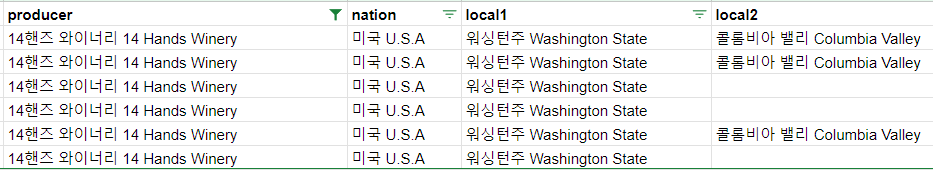

In [12]:
# local1~4(지역), varieties1~12(품종)은 제외한 표
# producer생산자와 nation지역, local은 같은 값을 가지는 경향을 보이며, local2의 결측치도 채울 수 있을 것 같다.
selected_columns = ['name', 'producer', 'nation', 'type', 'use', 'abv', 'degree', 'sweet', 'acidity', 'body', 'tannin', 'price', 'year', 'price/100ml']
df2 = df[selected_columns]
df2.head(10)

,name,producer,nation,type,use,abv,degree,sweet,acidity,body,tannin,price,year,price/100ml
0,Altair,알타이르 Altair,칠레 Chile,Red,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000.0,2014.0,29333.0
1,"Altair, Sideral",알타이르 Altair,칠레 Chile,Red,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000.0,2016.0,14667.0
2,Baron du Val Red,바론 듀 발 Baron du Val,프랑스 France,Red,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,NaN,NaN,NaN
3,Baron du Val White,바론 듀 발 Baron du Val,프랑스 France,White,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,NaN,NaN,NaN
4,"Benziger, Cabernet Sauvignon",벤지거 Benziger,미국 U.S.A,Red,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,NaN,2003.0,NaN
5,"Calvet, Beaujolais Villages",깔베 Calvet,프랑스 France,Red,Table,12,13~15,SWEET2,ACIDITY4,BODY2,TANNIN2,NaN,2007.0,NaN
6,"Calvet, Aetos",깔베 Calvet,프랑스 France,Red,Table,13,17~19,SWEET1,ACIDITY3,BODY4,TANNIN3,NaN,2003.0,NaN
7,"Calvet, Bordeaux Red",깔베 Calvet,프랑스 France,Red,Table,13~14,16~18,SWEET1,ACIDITY3,BODY2,TANNIN3,21000.0,2011.0,2800.0
8,"Calvet, Bordeaux white",깔베 Calvet,프랑스 France,White,Table,11.5,9~11,SWEET1,ACIDITY4,BODY2,TANNIN1,21000.0,2010.0,2800.0
9,"Calvet, Varietals Cabernet Sauvignon",깔베 Calvet,프랑스 France,Red,Table,13~14,16~18,SWEET1,ACIDITY3,BODY2,TANNIN3,19000.0,2017.0,2533.0


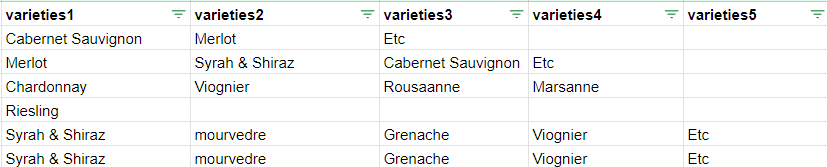

In [ ]:
# 같은 생산자라도 사용한 품종이 다르고 순서에 의미가 있는지 아닌지도 잘 모르겠다. 기타등등이라는 것도 보이고...

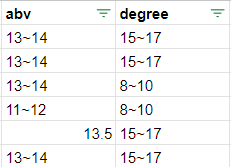

In [13]:
# describe() 메서드는 데이터프레임에 직접적으로 적용되는 메서드이다. 주의!
# unique값이 엄청난 이유는 너무나 세분화 되어있음.
df[['abv', 'degree']].describe(include='all')

,abv,degree
count,14459,14460
unique,184,81
top,13.5,16~18
freq,1825,6295


In [36]:
# abv, degree도 일단 보류한다. (이후 abv, degree, varieties 방향고민, producer가 location정보 포함)
selected_columns_2 = ['name', 'producer', 'nation', 'type', 'use', 'sweet', 'acidity', 'body', 'tannin', 'price', 'year', 'price/100ml']
df3 = df[selected_columns_2]
df3.head(10)

,name,producer,nation,type,use,sweet,acidity,body,tannin,price,year,price/100ml
0,Altair,알타이르 Altair,칠레 Chile,Red,Table,SWEET1,ACIDITY4,BODY5,TANNIN4,220000.0,2014.0,29333.0
1,"Altair, Sideral",알타이르 Altair,칠레 Chile,Red,Table,SWEET1,ACIDITY3,BODY4,TANNIN4,110000.0,2016.0,14667.0
2,Baron du Val Red,바론 듀 발 Baron du Val,프랑스 France,Red,Table,SWEET2,ACIDITY3,BODY2,TANNIN2,NaN,NaN,NaN
3,Baron du Val White,바론 듀 발 Baron du Val,프랑스 France,White,Table,SWEET1,ACIDITY3,BODY2,TANNIN1,NaN,NaN,NaN
4,"Benziger, Cabernet Sauvignon",벤지거 Benziger,미국 U.S.A,Red,Table,SWEET1,ACIDITY3,BODY3,TANNIN4,NaN,2003.0,NaN
5,"Calvet, Beaujolais Villages",깔베 Calvet,프랑스 France,Red,Table,SWEET2,ACIDITY4,BODY2,TANNIN2,NaN,2007.0,NaN
6,"Calvet, Aetos",깔베 Calvet,프랑스 France,Red,Table,SWEET1,ACIDITY3,BODY4,TANNIN3,NaN,2003.0,NaN
7,"Calvet, Bordeaux Red",깔베 Calvet,프랑스 France,Red,Table,SWEET1,ACIDITY3,BODY2,TANNIN3,21000.0,2011.0,2800.0
8,"Calvet, Bordeaux white",깔베 Calvet,프랑스 France,White,Table,SWEET1,ACIDITY4,BODY2,TANNIN1,21000.0,2010.0,2800.0
9,"Calvet, Varietals Cabernet Sauvignon",깔베 Calvet,프랑스 France,Red,Table,SWEET1,ACIDITY3,BODY2,TANNIN3,19000.0,2017.0,2533.0


In [37]:
# price의 결측치 확인
df3.describe(include='all')

,name,producer,nation,type,use,sweet,acidity,body,tannin,price,year,price/100ml
count,21605,21605,21605,21547,21591,21603,21592,21592,21592,1.251200e+04,19004.000000,1.245100e+04
unique,21531,4825,33,9,12,5,5,5,5,NaN,NaN,NaN
top,Chateau Bel Air,루이 자도 Louis Jadot,프랑스 France,Red,Table,SWEET1,ACIDITY3,BODY3,TANNIN1,NaN,NaN,NaN
freq,4,84,6949,13853,17907,18995,11081,9023,7568,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600060e+05,2012.195275,2.145701e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.146727e+05,4.962949,4.109901e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e+03,1967.000000,6.530000e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+04,2008.000000,5.333000e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.400000e+04,2013.000000,1.000000e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+05,2016.000000,2.186700e+04


In [38]:
# name에 중복값이 있다. 결측치 없는 값 12512 producer=nation/acidity/body/tannin
# 중복되는 name살펴보기, type/use/sweet 에 대해서 중앙값/평균값 대체하기
df4 = df3[df3['price'].notnull()]
df4.describe(include='all')

,name,producer,nation,type,use,sweet,acidity,body,tannin,price,year,price/100ml
count,12512,12512,12512,12488,12505,12510,12512,12512,12512,1.251200e+04,11069.000000,1.245100e+04
unique,12486,3149,28,7,11,5,5,5,5,NaN,NaN,NaN
top,Chateau Bel Air,테스코 파이니스트 Tesco Finest,프랑스 France,Red,Table,SWEET1,ACIDITY3,BODY3,TANNIN1,NaN,NaN,NaN
freq,3,67,3944,7938,10236,11043,6318,5181,4466,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600060e+05,2012.357395,2.145701e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.146727e+05,4.974603,4.109901e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e+03,1976.000000,6.530000e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+04,2009.000000,5.333000e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.400000e+04,2014.000000,1.000000e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+05,2017.000000,2.186700e+04


여기까지 데이터를 살펴봤고 문제 해결 부분인 3. 산점도 만들기로 넘어가시오.

번외) 결측치 제거해보기 코드

In [21]:
# 전체 데이터 가격 결측치 제거 해보기
df_not_null_price = df[df['price'].notnull()]
# df_not_null_price = df.dropna(subset=['price']) # 위와 같음
df_not_null_price.head(3)

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml,price/100ml
0,137197,Altair,알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,Merlot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000.0,2014.0,750.0,29333.0
1,137198,"Altair, Sideral",알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,Carmenere,Cabernet Franc,Syrah & Shiraz,Petit Verdot,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000.0,2016.0,750.0,14667.0
7,137204,"Calvet, Bordeaux Red",깔베 Calvet,프랑스 France,보르도 Bordeaux,NaN,NaN,NaN,Merlot,Cabernet Sauvignon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,13~14,16~18,SWEET1,ACIDITY3,BODY2,TANNIN3,21000.0,2011.0,750.0,2800.0


번외) 결측치 제거 코드 타입 알아보기

In [40]:
# 데이터 타입: 시리즈
df['price'].notnull()[:5]

0     True
1     True
2    False
3    False
4    False
Name: price, dtype: bool

메소드 설명
- top: 범주형 변수의 가장 빈도가 높은 값, 즉 최빈값을 의미합니다.
- freq: 범주형 변수의 가장 빈도가 높은 값의 빈도, 최빈값의 등장 횟수를 보여줍니다.
- std: 데이터의 산포도를 나타내는 지표로, 값들이 평균에서 얼마나 퍼져 있는지를 측정합니다.

- 50%: 데이터의 중간값(median)을 나타냅니다. 데이터를 크기순으로 정렬했을 때 중간에 위치한 값으로, 데이터의 중심 경향을 나타내는 지표 중 하나입니다. 중간값은 이상치(Outlier)의 영향을 덜 받기 때문에 데이터의 분포를 파악하는데 유용합니다. 데이터가 홀수개인 경우에는 중간값이 데이터의 중간에 위치한 값이고, 데이터가 짝수개인 경우에는 중간의 두 값의 평균이 됩니다.

- 25%: 데이터의 하위 25%에 해당하는 값을 의미합니다. 데이터를 작은 값부터 큰 값으로 정렬했을 때, 하위 25%에 해당하는 위치에 있는 값을 나타냅니다. 이는 데이터의 하위 사분위수(Q1)를 의미하며, 데이터의 하위 경계를 나타내는 지표 중 하나입니다. 이 값은 데이터의 분포를 파악하고 이상치를 식별하는데 도움이 됩니다.

- 75%: 데이터의 상위 25%에 해당하는 값을 의미합니다. 데이터를 작은 값부터 큰 값으로 정렬했을 때, 상위 25%에 해당하는 위치에 있는 값을 나타냅니다. 이는 데이터의 상위 사분위수(Q3)를 의미하며, 데이터의 상위 경계를 나타내는 지표 중 하나입니다. 이 값은 데이터의 분포를 파악하고 이상치를 식별하는데 도움이 됩니다.

표준편차(standard deviation)
1. 표준 편차가 클수록 데이터가 평균으로부터 더 퍼져 있음을 나타냅니다.
2. 표준 편차(standard deviation)는 데이터의 산포도를 나타내는 지표이므로 최대값이나 최소값을 가지지 않습니다.
3. 표준 편차는 데이터 값들이 평균으로부터 얼마나 퍼져 있는지를 측정하는데 사용되며, 값의 범위는 항상 0 이상입니다.
4. 표준 편차가 0이면 모든 데이터가 평균값과 동일하므로 데이터가 전혀 퍼져 있지 않다는 것을 의미합니다.
5. 일반적으로 표준 편차가 클수록 데이터가 평균에서 더 멀리 퍼져 있음을 나타냅니다.

# 2.데이터 살펴보기 → 회의 → 상담

종속 변수(y) : price(12512)

입력 변수(x)
- 수치형 변수 : year(11069), ml(12451)
- 범주형 변수 : name이름(12512), producer생산자(12512), nation국가(12512)
- 기타 : type종류(12488), use용도(12505)
- 순위 : sweet당도(12510), acidity산도(12512), body바디감(12512), tannin탄닌(12512)

Q. 전체 데이터 21605 중에 와인 가격이 있는 데이터는 12512개이다. price에 대한 결측치는?

A. 학습시킬 때 필요한 값이 맞음.
1. 결측치 제거하거나 채우는 방법(평균을 이용?)이 있다.
2. KNN방법론 언급
3. 첫 번째, 모델을 빠르게 만들거면 결측치를 제거하고 price있는거부터 적합시킨다.
4. 두 번째, 해당 데이터 절반을 날리는 건 아까우니까 활용한다: 결측치 채우는 방법을 연구를 해본다.

Q. 마트에서 팔 때도 100g당 얼마하는 것처럼 최소100ml니까 100ml당 얼마해서 계산해야 하는거 아닌지?

A. 맞음.

Q. price, ml는 중앙값과 평균값이 크게 차이나는 이유는 (str로 확인도 가능) 위의 이유라고 생각했다. 맞나?

A. 맞음.

Q. 같은 생산자라도 사용한 품종이 다르고 순서에 의미가 있는지 아닌지도 잘 모르겠다. 기타등등이라는 것도 보이고...

Q. abv도수, degree온도가 너무나 세분화된 문제가 있고 수치형이 아니라 범주형이다.

해결 방법을 생각해봤는데 최대에 맞추기, 그룹별로 나누기

Q. 이후 abv, degree, varieties 방향고민, producer가 location정보 포함

Q. 결측치 없는 값 12512 producer=nation/acidity/body/tnannin

Q. 중복되는 name살펴보기, type/use/sweet 에 대해서 중앙값/평균값 대체하기

Q. plt.figure(figsize=(10, 6)) 에러

# 3.산점도 만들기

문제 해결 순서
1. 중복되는 이름 26개가 있다. 같은 와인이라도 생산자가 다르다. 생산자가 다르니 nation은 같아도 local값이 다 다르다.
    - 근데 유니크 값이 너무 많고 최빈값이 3인데 공통점이 없는 문제가 있다.
2. 결측치가 없는 값 4개에 대해서 먼저 producer=nation 산점도를 확인한다. (acidity, body, tannin 순위도 가능한지?)
3. 결측치가 있는 type/use/swwet에 대해서 고민하기 (use, sweet는 데이터 쏠림현상)
4. 도수/온도
5. 품종의 리스트화

In [41]:
df4.head(5)

,name,producer,nation,type,use,sweet,acidity,body,tannin,price,year,price/100ml
0,Altair,알타이르 Altair,칠레 Chile,Red,Table,SWEET1,ACIDITY4,BODY5,TANNIN4,220000.0,2014.0,29333.0
1,"Altair, Sideral",알타이르 Altair,칠레 Chile,Red,Table,SWEET1,ACIDITY3,BODY4,TANNIN4,110000.0,2016.0,14667.0
7,"Calvet, Bordeaux Red",깔베 Calvet,프랑스 France,Red,Table,SWEET1,ACIDITY3,BODY2,TANNIN3,21000.0,2011.0,2800.0
8,"Calvet, Bordeaux white",깔베 Calvet,프랑스 France,White,Table,SWEET1,ACIDITY4,BODY2,TANNIN1,21000.0,2010.0,2800.0
9,"Calvet, Varietals Cabernet Sauvignon",깔베 Calvet,프랑스 France,Red,Table,SWEET1,ACIDITY3,BODY2,TANNIN3,19000.0,2017.0,2533.0


In [53]:
df4.describe(include='all')

,name,producer,nation,type,use,sweet,acidity,body,tannin,price,year,price/100ml
count,12512,12512,12512,12488,12505,12510,12512,12512,12512,1.251200e+04,11069.000000,1.245100e+04
unique,12486,3149,28,7,11,5,5,5,5,NaN,NaN,NaN
top,Chateau Bel Air,테스코 파이니스트 Tesco Finest,프랑스 France,Red,Table,SWEET1,ACIDITY3,BODY3,TANNIN1,NaN,NaN,NaN
freq,3,67,3944,7938,10236,11043,6318,5181,4466,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600060e+05,2012.357395,2.145701e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.146727e+05,4.974603,4.109901e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e+03,1976.000000,6.530000e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+04,2009.000000,5.333000e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.400000e+04,2014.000000,1.000000e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+05,2017.000000,2.186700e+04


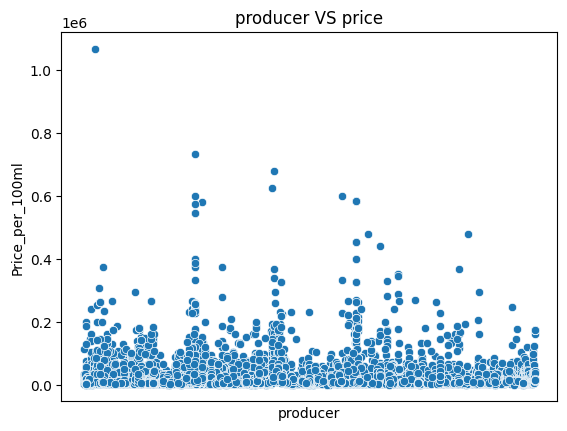

In [51]:
# 산점도를 만든다. (sns_scatter plot이 직관적이다.)
sns.scatterplot(data = df4, x = 'producer', y = 'price/100ml')
# sns가 plt을 상속하기 때문에 연관이 있기에 같이 섞어 써도 무방하다.
plt.title('producer VS price')
plt.xlabel('producer')
plt.ylabel('Price_per_100ml')
# x축의 눈금을 제거한다.
plt.xticks([])
plt.show()

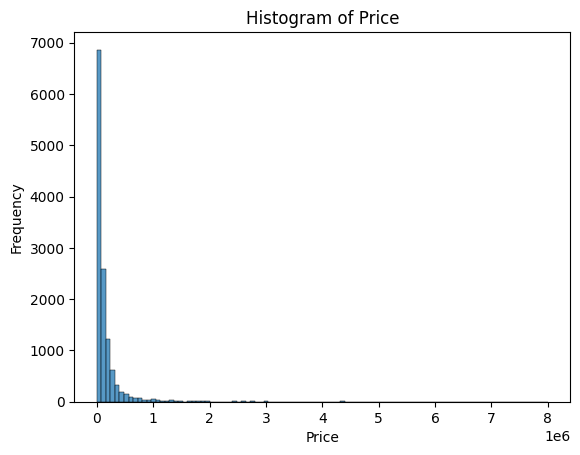

In [86]:
# 가격이 대체로 낮게 분포되어 있어서 히스토그램을 살펴본다.
# bins 데이터 분포 구간에 대한 범위 설정 값의 차이 (100 vs 30)
# plt.hist(data=df4, x='price', bins=30)
# plt.title('histogram')
# plt.xlabel('producer')
# plt.ylabel('frequency')
# plt.show()

# 다른 방법
sns.histplot(data=df, x='price', bins=100) # , kde=True) 부드럽게 이어주기
plt.title('Histogram of Price')
# plt.figure(figsize=(10, 6)) 에러
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

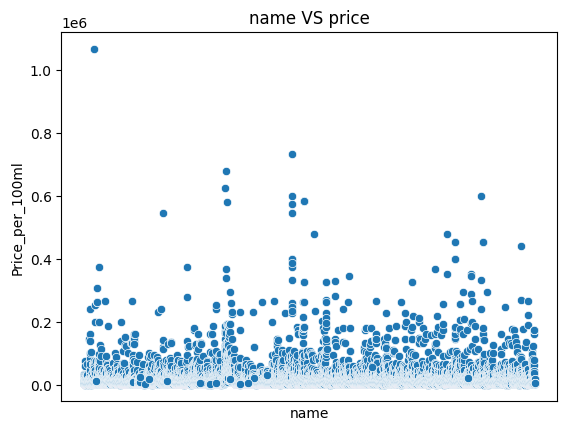

In [55]:
sns.scatterplot(data = df4, x = 'name', y = 'price/100ml')
plt.title('name VS price')
plt.xlabel('name')
plt.ylabel('Price_per_100ml')
plt.xticks([])
plt.show()

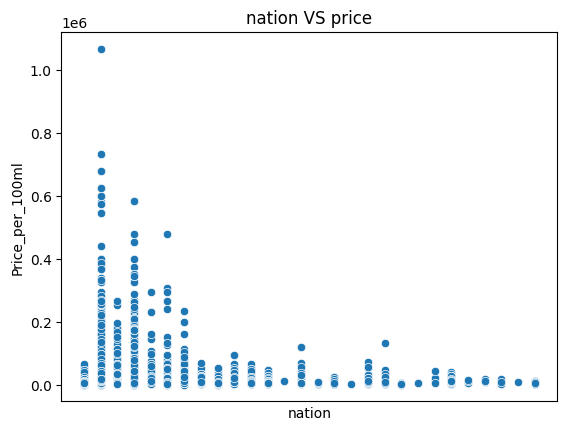

In [52]:
sns.scatterplot(data = df4, x = 'nation', y = 'price/100ml')
plt.title('nation VS price')
plt.xlabel('nation')
plt.ylabel('Price_per_100ml')
plt.xticks([])
plt.show()

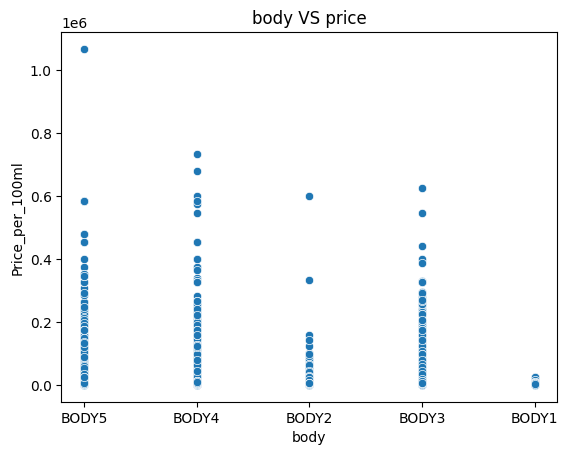

In [54]:
sns.scatterplot(data = df4, x = 'body', y = 'price/100ml')
plt.title('body VS price')
plt.xlabel('body')
plt.ylabel('Price_per_100ml')
plt.show()

# 4. 개념 질문내용 정리하기